In [1]:
%cd ..

/home/juanhevia/IDIL


In [8]:
import generate_trajectories as traj_utils
import numpy as np
import os
import pickle as pkl
import matplotlib.pyplot as plt


ENV_NAME = "CleanupSingle-v0"

In [3]:
# Test with a sample run ID
RUN_ID = "es-20-01J2X0ES9369YMG1QWHE00JKK2"

In [4]:
trajectory_data = traj_utils.generate_agent_trajectories(run_id=RUN_ID, env_name=ENV_NAME)

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J2X0ES9369YMG1QWHE00JKK2/2024-07-16_00-32-47/model/iq_CleanupSingle-v0_n100_l100_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J2X0ES9369YMG1QWHE00JKK2/2024-07-16_00-32-47/model/iq_CleanupSingle-v0_n100_l100_best_pi


100%|██████████| 5/5 [00:01<00:00,  3.46it/s]


In [7]:
# save pickle file
with open("idil_train/test_data/sample_trajs.pkl", "wb") as f:
    pkl.dump(trajectory_data, f)

# Test with `MultiGoals`

In [4]:
RUN_ID = "es-60-01J2P9BAHJ4JCE3XXT4TAGXZDB"

In [5]:
trajectory_data = traj_utils.generate_agent_trajectories(run_id=RUN_ID, env_name="MultiGoals2D_3-v0")

/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/juanhevia/miniconda3/envs/aidil/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


Loading models from ./idil_train/result/MultiGoals2D_3-v0/idil/es-60-01J2P9BAHJ4JCE3XXT4TAGXZDB/2024-07-13_09-53-30/model/iq_MultiGoals2D_3-v0_n100_l50_best_tx
Loading models from ./idil_train/result/MultiGoals2D_3-v0/idil/es-60-01J2P9BAHJ4JCE3XXT4TAGXZDB/2024-07-13_09-53-30/model/iq_MultiGoals2D_3-v0_n100_l50_best_pi_actor and ./idil_train/result/MultiGoals2D_3-v0/idil/es-60-01J2P9BAHJ4JCE3XXT4TAGXZDB/2024-07-13_09-53-30/model/iq_MultiGoals2D_3-v0_n100_l50_best_pi_critic


100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


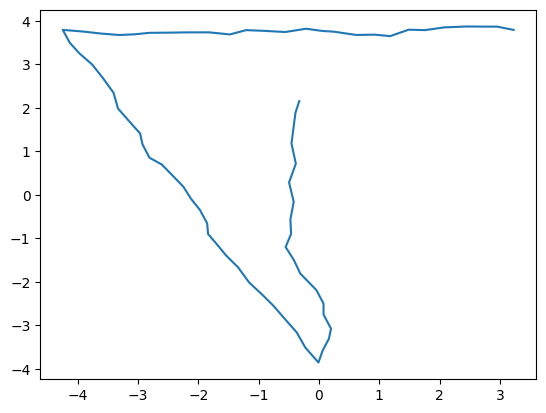

In [9]:
_arr = np.array(trajectory_data["states"][0])
plt.plot(_arr[:, 0], _arr[:, 1])

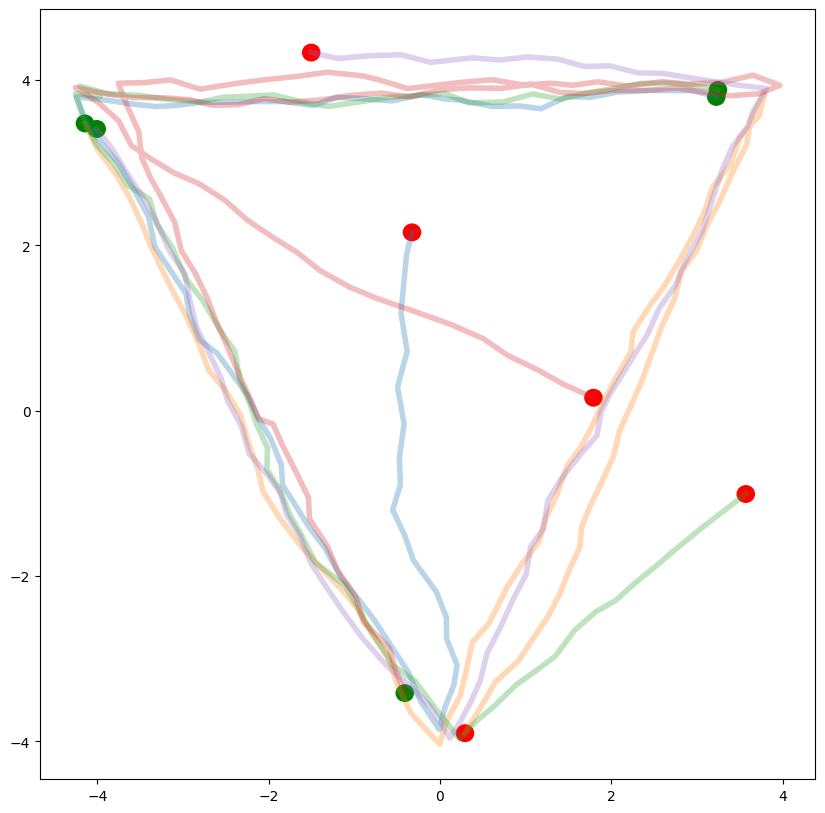

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

for traj_idx in range(len(trajectory_data["states"])):
    _arr = np.array(trajectory_data["states"][traj_idx])
    ax.plot(_arr[:, 0], _arr[:, 1], label=f"Trajectory {traj_idx}", alpha=0.3, lw=4)

    # add a big circle patch in the start and end staets
    ax.add_patch(plt.Circle(_arr[0], 0.1, color='r'))
    ax.add_patch(plt.Circle(_arr[-1], 0.1, color='g'))

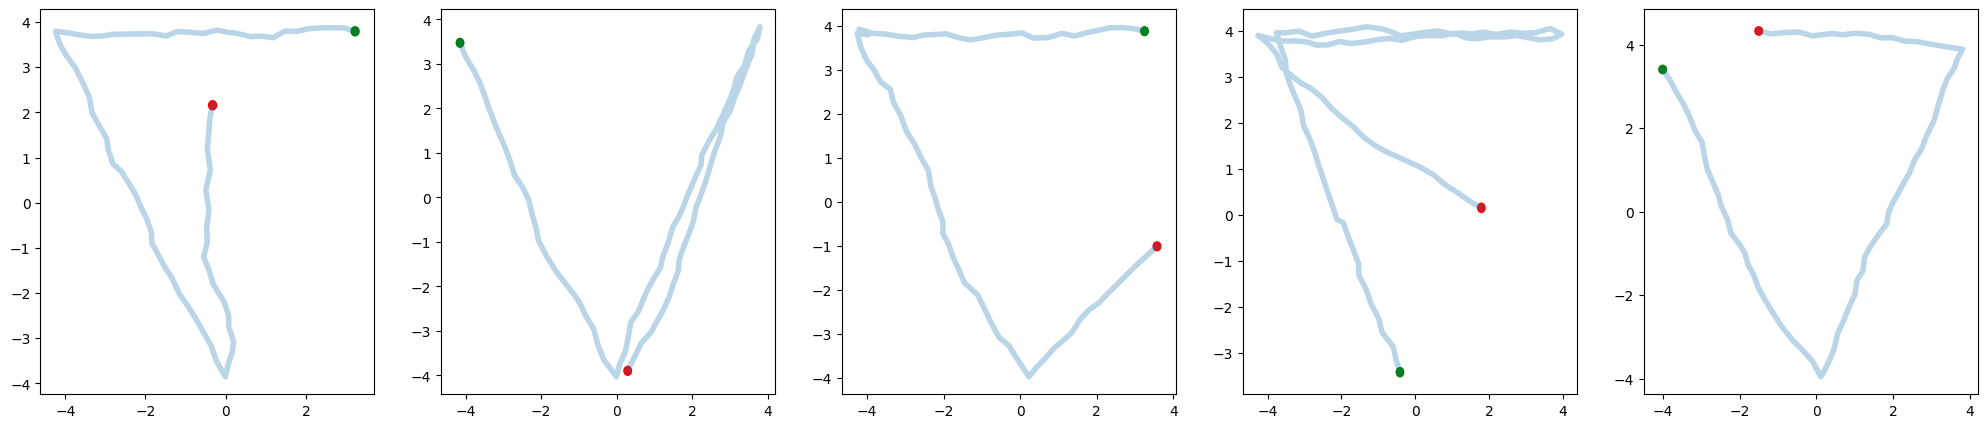

In [16]:
# plot each trajectory in a different space
fig, ax = plt.subplots(1, len(trajectory_data["states"]), figsize=(5 * int(len(trajectory_data["states"])), 5))

for traj_idx in range(len(trajectory_data["states"])):
    _arr = np.array(trajectory_data["states"][traj_idx])
    ax[traj_idx].plot(_arr[:, 0], _arr[:, 1], label=f"Trajectory {traj_idx}", alpha=0.3, lw=4)

    # add a big circle patch in the start and end staets
    ax[traj_idx].add_patch(plt.Circle(_arr[0], 0.1, color='r'))
    ax[traj_idx].add_patch(plt.Circle(_arr[-1], 0.1, color='g'))

## Generalize for various RUN_IDs

In [ ]:
RUN_ID_LIST = [] # placeholder
ENV_NAME = "MultiGoals2D_3-v0"
COLORS = ["r", "g", "b", "c", "m", "y", "k"]


fig, ax = plt.subplots(1, len(RUN_ID_LIST), figsize=(6 * len(RUN_ID_LIST), 6))



for run_idx, run_id in enumerate(RUN_ID_LIST):
    traj_data = traj_utils.generate_agent_trajectories(run_id=run_id, env_name=ENV_NAME)

    for traj_idx in range(len(traj_data["states"])):
        _arr = np.array(traj_data["states"][traj_idx])
        ax[run_idx].plot(_arr[:, 0], _arr[:, 1], label=f"R{run_idx}T{traj_idx}", alpha=0.3, lw=4, c=COLORS[run_idx])

        # add a big circle patch in the start and end staets
        ax[run_idx].add_patch(plt.Circle(_arr[0], 0.1, color='r'))
        ax[run_idx].add_patch(plt.Circle(_arr[-1], 0.1, color='g'))
